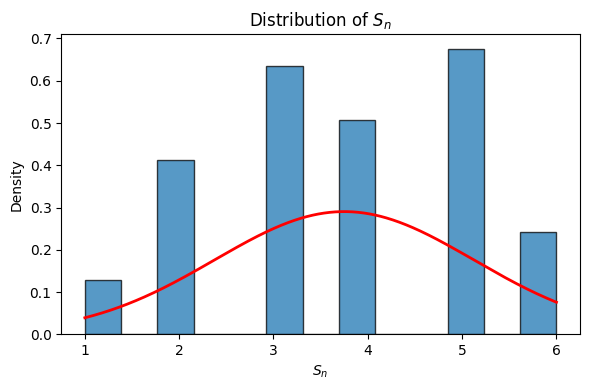

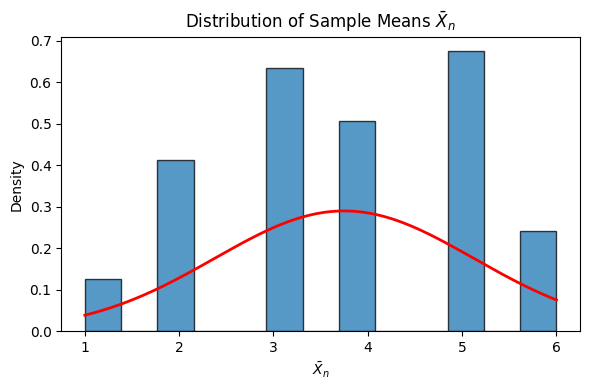

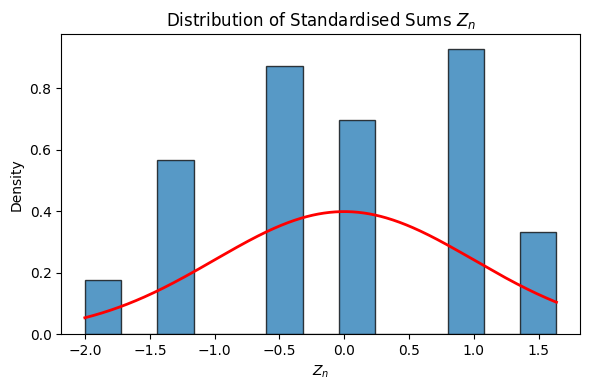

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# -------------------------------
# Distribution of the weighted die
# -------------------------------
faces = np.array([1, 2, 3, 4, 5, 6])
probabilities = np.array([0.05, 0.15, 0.25, 0.20, 0.25, 0.10])

# Theoretical moments
mu = np.sum(faces * probabilities)
variance = np.sum((faces - mu)**2 * probabilities)
sigma = np.sqrt(variance)

# -------------------------------
# Simulation parameters
# -------------------------------
n_trials = 1000
n = 1          # change to 10 for optional extension

# -------------------------------
# Simulation
# -------------------------------
samples = np.random.choice(
    faces, size=(n_trials, n), p=probabilities
)

S_n = samples.sum(axis=1)
Xbar_n = S_n / n
Z_n = (S_n - n * mu) / (sigma * np.sqrt(n))

# -------------------------------
# Plotting helper
# -------------------------------
def plot_histogram(data, mean, std, title, xlabel):
    plt.figure(figsize=(6, 4))
    
    plt.hist(
        data,
        bins='auto',
        density=True,
        alpha=0.75,
        edgecolor='black'
    )
    
    t = np.linspace(min(data), max(data), 500)
    plt.plot(t, norm.pdf(t, mean, std), linewidth=2, color='r')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

# -------------------------------
# Plots
# -------------------------------
plot_histogram(
    S_n,
    mean=n * mu,
    std=sigma * np.sqrt(n),
    title="Distribution of $S_n$",
    xlabel="$S_n$"
)

plot_histogram(
    Xbar_n,
    mean=mu,
    std=sigma / np.sqrt(n),
    title="Distribution of Sample Means $\\bar{X}_n$",
    xlabel="$\\bar{X}_n$"
)

plot_histogram(
    Z_n,
    mean=0,
    std=1,
    title="Distribution of Standardised Sums $Z_n$",
    xlabel="$Z_n$"
)
